In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Half adder implemented for qubits
# Writes over an input state to reduce the total number of qubits

# set input states (|0> or |1>)
circuit.x(qreg_q[0]) 
circuit.x(qreg_q[1]) 

circuit.reset(qreg_q[2])

# calculate most significant bit
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])

# calculate least significant bit
circuit.cx(qreg_q[0], qreg_q[1])

circuit.measure(qreg_q[1], creg_c[0])
circuit.measure(qreg_q[2], creg_c[1])

print(circuit)

     ┌───┐             
q_0: ┤ X ├──■────■─────
     ├───┤  │  ┌─┴─┐┌─┐
q_1: ┤ X ├──■──┤ X ├┤M├
     └───┘┌─┴─┐└┬─┬┘└╥┘
q_2: ─|0>─┤ X ├─┤M├──╫─
          └───┘ └╥┘  ║ 
c: 2/════════════╩═══╩═
                 1   0 


In [2]:
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator') # the device to run on

In [3]:
from qiskit import transpile

# execute the quantum circuit
result = backend.run(transpile(circuit, backend), shots=1000).result()
counts  = result.get_counts(circuit)
print(counts)

{'10': 1000}


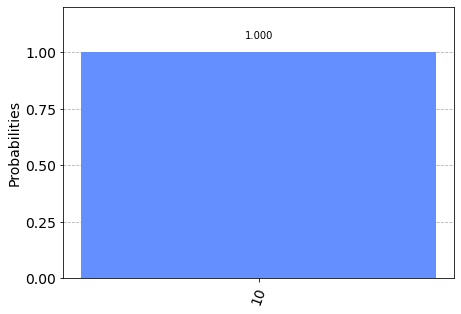

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)